# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 2.  線性迴歸訓練資料、測試資料

80%  training data, 20%  testing data ==> 先利用此來驗證各種模型(演算法)的好壞及調好到最佳參數
之後可以利用由這個80%的訓練資料所得的模型後,拿100%資料re-train模型以得到最佳模型 (此model會更佳fit data)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
#生成dataset，他是原始資料
x = np.linspace(0, 5, 50)
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20) #random_state打亂數據集，用第20號的打亂方法

print('x_train = ',x_train)

x_train =  [4.08163265 1.73469388 1.83673469 0.         2.75510204 3.36734694
 3.67346939 4.28571429 1.02040816 0.30612245 4.18367347 1.32653061
 4.69387755 0.20408163 3.87755102 3.97959184 0.51020408 4.3877551
 3.7755102  3.06122449 0.6122449  2.95918367 1.63265306 1.93877551
 5.         4.48979592 2.14285714 3.26530612 3.46938776 0.71428571
 2.24489796 1.12244898 2.04081633 0.91836735 4.89795918 2.85714286
 3.16326531 1.53061224 2.65306122 3.57142857]


In [9]:
y

array([1.42863627, 1.70057885, 0.94020056, 2.1327602 , 0.85667055,
       1.71274529, 1.71932929, 1.05442627, 2.07242235, 1.2307575 ,
       2.52543906, 2.0909555 , 2.57707472, 2.3932858 , 2.73907559,
       2.93829572, 2.9936781 , 2.23836124, 3.51070418, 2.74073572,
       3.49221089, 3.43675667, 4.03109209, 3.3161432 , 4.03396096,
       4.06118691, 3.74986111, 4.09777589, 4.35414617, 4.20892778,
       4.6497498 , 5.61252371, 3.85343108, 4.16771981, 4.28455415,
       4.54200826, 6.03971546, 5.33604383, 6.40221859, 6.5240768 ,
       6.14647507, 5.69581905, 5.42871171, 5.53388253, 6.76622318,
       5.7916096 , 6.17012725, 6.91286485, 6.4470761 , 6.64317089])

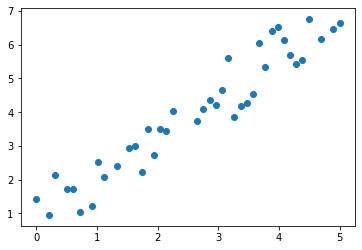

In [10]:
plt.scatter(x_train, y_train)

#### 用訓練資料來 fit 函數

記得現在我們只用 80% 的資料去訓練。

In [11]:
regr = LinearRegression()  #演算法
X_train = x_train.reshape(-1,1)  #轉乘2維
regr.fit(X_train,y_train)
print('Coefficients: ', regr.coef_)
print('interception: ', regr.intercept_)

Coefficients:  [1.15863323]
interception:  0.9608928635468805


In [12]:
Y_train = regr.predict(X_train) #預測值

In [13]:
mse = np.sum((Y_train-y_train)**2) / len(y_train)
print(mse)

0.2610894342942947


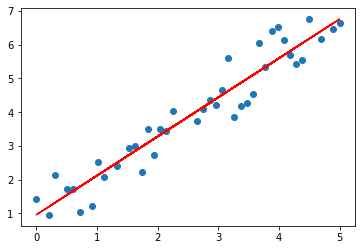

In [14]:
plt.scatter(x_train, y_train)  #原始訓練
plt.plot(x_train, Y_train, 'r')  #訓練預測

#### test with test data

In [15]:
#測試集預測出來的答案
X_test = x_test.reshape(-1,1)
Y_test = regr.predict(X_test)  #用測試集預測出來的Y值

print(Y_test)

[2.37962743 2.61608319 1.43380439 1.90671591 6.28114749 1.07912074
 3.91658988 3.798362   6.51760326 3.68013412]


$$\widehat{y}=xw+b=w_{1}x_{1}+b$$

In [16]:
#Y=WX+b
W=regr.coef_
b=regr.intercept_
W*X_test+b


array([[2.37962743],
       [2.61608319],
       [1.43380439],
       [1.90671591],
       [6.28114749],
       [1.07912074],
       [3.91658988],
       [3.798362  ],
       [6.51760326],
       [3.68013412]])

In [17]:
mse = np.sum((Y_test-y_test)**2) / len(y_test)
print(mse)

0.14056484536447258


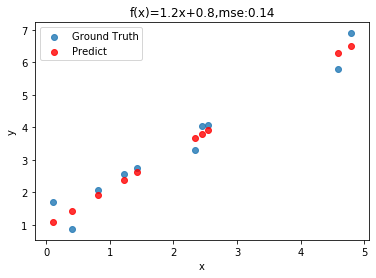

In [18]:
title='f(x)=1.2x+0.8'+',mse:'+str(round(mse,2))
plt.title(title)
plt.xlabel('x')
plt.ylabel('y')
#plt.grid(True)
plt.scatter(x_test, y_test,alpha=0.8,label='Ground Truth')  #原始
plt.scatter(x_test, Y_test, c='r', alpha=0.8,label='Predict') #預測
plt.legend()